In [38]:
from configparser import ConfigParser

In [39]:
cfg = 'config/sphereConfig_bias.cfg'

config = ConfigParser()
config.optionxform = str
config.read(cfg)

base = config['file']['base']
data = config['file']['data']
pairing = config['pairing']['scheme']

In [40]:
tree = Signal(get_NMSSM(700, 400))
tree.spherical_region(config)
# print(tree.A_SR_mask.sum(), tree.A_CR_mask.sum(), tree.V_SR_mask.sum(), tree.V_CR_mask.sum())

# print(round(tree.A_SRhs_mask.sum()/tree.A_SR_mask.sum(),3), round(tree.A_SRls_mask.sum()/tree.A_SR_mask.sum(), 3))
# nmedium_b = ak.sum(tree.get('jet_btag') > 0.0490, axis=1)
# ls_mask = nmedium_b < 5 # ls
# hs_mask = nmedium_b >= 5 # hs
# print(round(ak.sum(tree.A_SR_mask & hs_mask)/tree.A_SR_mask.sum(),3), round(ak.sum(tree.A_SR_mask & ls_mask)/tree.A_SR_mask.sum(), 3))

['total', 'trigger', 'npresel_jets>=6', 'nselect_jets>=6']


In [41]:
indir = f"root://cmseos.fnal.gov/{base}"
datFileName = f"{indir}{data}"
datTree = Signal(datFileName)
region_type = 'sphere'
datTree.spherical_region(config)
# print(datTree.A_CR_mask.sum(), datTree.V_SR_mask.sum(), datTree.V_CR_mask.sum())
# print(round(datTree.A_CRhs_mask.sum()/datTree.A_CR_mask.sum(),3), round(datTree.A_CRls_mask.sum()/datTree.A_CR_mask.sum(), 3))
# nmedium_b = ak.sum(datTree.get('jet_btag') > 0.0490, axis=1)
# ls_mask = nmedium_b < 5 # ls
# hs_mask = nmedium_b >= 5 # hs
# print(round(ak.sum(datTree.A_CR_mask & hs_mask)/datTree.A_CR_mask.sum(), 3), round(ak.sum(datTree.A_CR_mask & ls_mask)/datTree.A_CR_mask.sum(), 3))

VR_center   = 174
SR_edge     = 30
CR_edge     = 40
--------------------



In [49]:
sig_ASR_mask = tree.A_CR_mask
dat_ACR_mask = datTree.A_CR_mask

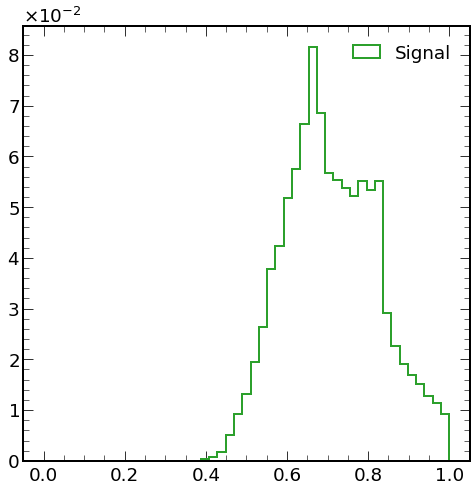

In [50]:
bins = np.linspace(0, 1, 50)

fig, ax = plt.subplots()

_ = Hist(tree.btag_avg, bins=bins, ax=ax, label='Signal', density=1, color='C2')


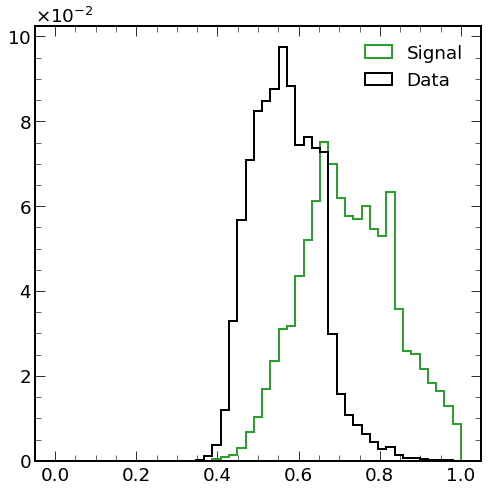

In [53]:
bins = np.linspace(0, 1, 50)
fig, ax = plt.subplots()

_ = Hist(tree.btag_avg[sig_ASR_mask], bins=bins, ax=ax, label='Signal', density=1, color='C2')
_ = Hist(datTree.btag_avg[dat_ACR_mask], bins=bins, ax=ax, label='Data', density=1, color='k')

In [ ]:
sig_n_lbtag = ak.sum(tree.get('jet_btag') > 0.0490, axis=1)[sig_ASR_mask]
dat_n_lbtag = ak.sum(datTree.get('jet_btag') > 0.0490, axis=1)[dat_ACR_mask]

sig_n_mbtag = ak.sum(tree.get('jet_btag') > 0.2783, axis=1)[sig_ASR_mask]
dat_n_mbtag = ak.sum(datTree.get('jet_btag') > 0.2783, axis=1)[dat_ACR_mask]

sig_n_tbtag = ak.sum(tree.get('jet_btag') > 0.7100, axis=1)[sig_ASR_mask]
dat_n_tbtag = ak.sum(datTree.get('jet_btag') > 0.7100, axis=1)[dat_ACR_mask]


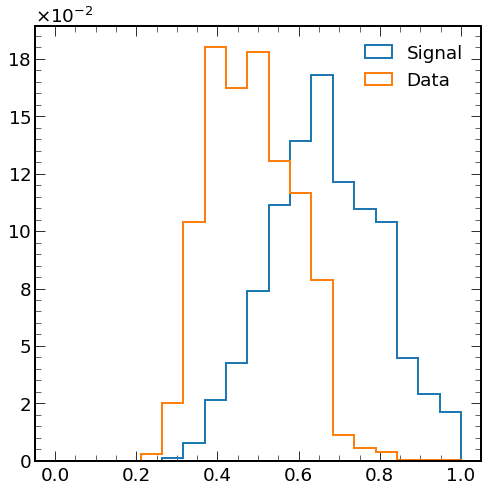

In [36]:
bins = np.linspace(0, 1, 20)
fig, ax = plt.subplots()

_ = Hist(tree.btag_avg2[sig_ASR_mask], bins=bins, ax=ax, label='Signal', density=1)
_ = Hist(datTree.btag_avg2[dat_ACR_mask], bins=bins, ax=ax, label='Data', density=1)

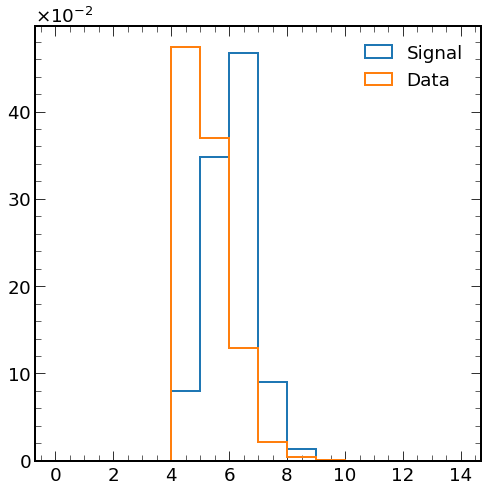

In [43]:
bins = np.arange(15)
fig, ax = plt.subplots()

_ = Hist(sig_n_lbtag, bins=bins, ax=ax, label='Signal', density=1)
_ = Hist(dat_n_lbtag, bins=bins, ax=ax, label='Data', density=1)

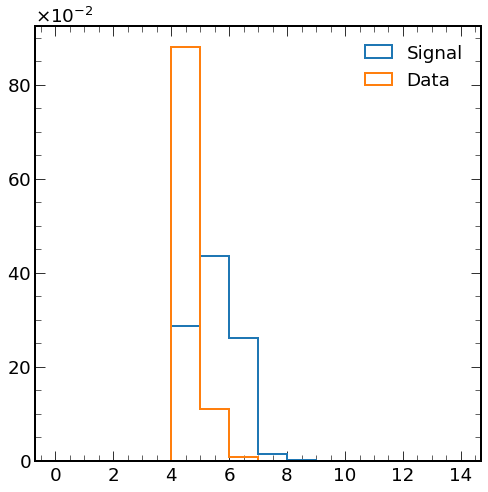

In [46]:
bins = np.arange(15)
fig, ax = plt.subplots()

_ = Hist(sig_n_mbtag, bins=bins, ax=ax, label='Signal', density=1)
_ = Hist(dat_n_mbtag, bins=bins, ax=ax, label='Data', density=1)

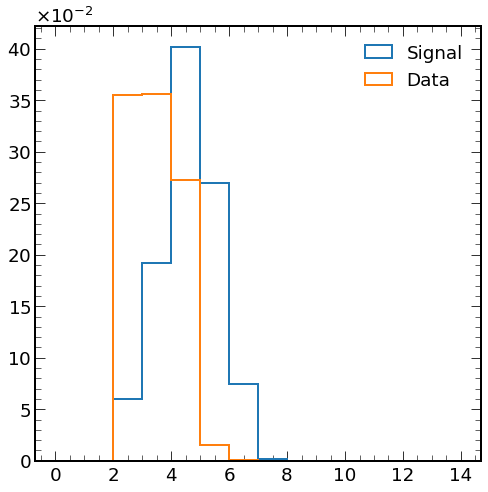

In [48]:
bins = np.arange(15)
fig, ax = plt.subplots()

_ = Hist(sig_n_tbtag, bins=bins, ax=ax, label='Signal', density=1)
_ = Hist(dat_n_tbtag, bins=bins, ax=ax, label='Data', density=1)

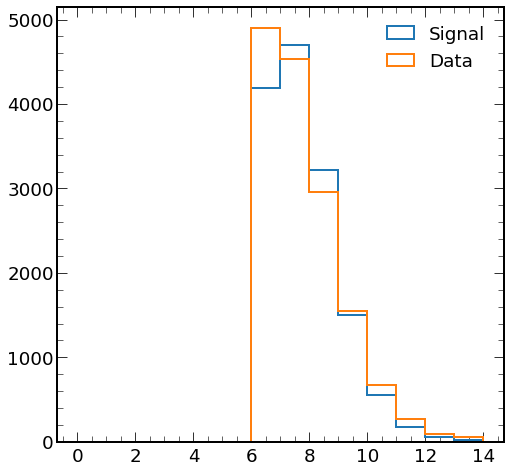

In [20]:
bins = np.arange(15)
fig, ax = plt.subplots()

_ = Hist(tree.get('n_jet')[sig_ASR_mask], bins=bins, ax=ax, label='Signal')
_ = Hist(datTree.get('n_jet')[dat_ACR_mask], bins=bins, ax=ax, label='Data')